# Becoming autonomous with SLURM 

The main goal of this notebook is to guide you through basic concepts and usages of the SLURM queue system. The notebook is divided in two parts:

1.   **SLURM Queue System.** We will see different types of scripts and basic commands needed to navigate through SLURM. For this, we'll need to use our GPU servers.

2.   **Environment Management.** The objective here is to get familiar with what is needed to get the Python environment running (and then use it with SLURM). We will make some inferences with a LM to ensure that everything is installed and used correctly.





## SLURM Queue System

<img src="https://i.pinimg.com/originals/c0/e0/e8/c0e0e8a625266e4d93cc35f9f7983a05.jpg" width=200px/>

A process sent to this queue system will be hold on queue until the needed resources are available, so we could say that SLURM manages this automatically. In order to achieve this, it is necessary to specify the requirements of each of your processes. There is nothing more to it. 

If you usually work with .sh script files, you will need less than 5 minutes to adapt them and send them to the SLURM system.

### Our servers

Before starting with SLURM, let's talk about our GPU servers- We've currently got 8 different servers, and out of those 8, these 5 use SLURM:

* **Kixmi**.ixa.eus --> 4x RTX 2080ti (11Gb)

* **Traganarru**.ixa.eus --> 4x V100 (32Gb)

* **Tximista**.ixa.eus --> 4x A100 (80Gb)

* **Trumoi**.ixa.eus --> 8x A100 (80Gb)

* **Xirimiri**.ixa.eus --> 2x A30 (24Gb) 

There are 3 other GPU servers with currently no queue system. This means that in order to avoid the reigning of anarchy, we need to use a spreadsheet and book the GPUs that we need on our own: https://docs.google.com/spreadsheets/d/1RaAfYUhjDmRCNBXpDKPmg6G0HxEGaP7cbBXgnjQ9DpQ/edit#gid=0

* **Mamarro**.ixa.eus --> 4x Titan XP/X (11Gb)

* **Txoronpio**.ixa.eus --> 4x Titan XP (32Gb)

* **Mari**.ixa.eus --> 8x Titan V (12Gb)

In order to use a specific GPU on one of these servers, you need to set a parameter in the command line before running your experiments. Let's say that you need to use the second GPU of a given server. Once you are connected to that server, run one of the following commands:

```
setenv CUDA_VISIBLE_DEVICES 1 # If you are in our servers' terminal
export CUDA_VISIBLE_DEVICES=1 # If you are in a Bash file or another system
```

Then, you will be able to follow your wildest dreams and fine-tune a BERT-Base model, congratulations!

### Connecting to our servers

Today we'll use Kixmi, as it's usually empty and it's more than enough for today's testing purposes. In your command line, run the following with your username and enter your password when prompted to do so.

```
ssh USERNAME@kixmi.ixa.eus  # Connect to Kixmi via SSH with your username 
```

The username is your LDAP, and if you don't know the password, ask your closest technician to reset your password!

Sometimes, for example when working with Jupyter Notebooks, you'd like to redirect one of the ports of the server to your local PC. This can be easily done by adding an argument to the SSH command.

```
ssh -L 8888:localhost:7777 USERNAME@kixmi.ixa.eus   # Redirects the port 8888 of the server to your PC's port 7777
```

####**1. EXERCISE**
**Download the code we are going to use from GitHub into our servers.**

Connect with your credentials to Kixmi, our GPU server with the smallest GPUs, using `ssh USERNAME@kixmi.ixa.eus`.

Then, clone the following GitHub repository in our servers: https://github.com/osainz59/slurm-proba. To do so, you just need to clone the repository wherever you like.

For example, let's use your home directory and create a folder where we'll store everything of today's lab named `mintegi_slurm`.

```
cd ~                  # Move to your home directory (or any path you'd like)
mkdir mintegi_slurm   # Create a folder called MintegiSLURM
cd mintegi_slurm      # Move inside the folder
```

After that, we will clone or download the repository with the code we are going to use today. This is easily done with the following command.

```
git clone https://github.com/osainz59/slurm-proba.git
```

In the case of GitHub, any public repository can downloaded by changing the URL of the repository. Therefore, the template to download a repository is `git clone URL.git` (don't forget to append .git to the URL!).


You can check now that a new folder has been created in your current directory, named `slurm-proba`. The code used in the following exercises can be found there!

### Sending processes to SLURM

There are 3 basic commands that everyone starting with SLURM should get familiar with.

1. `squeue` shows the current queue of the server.
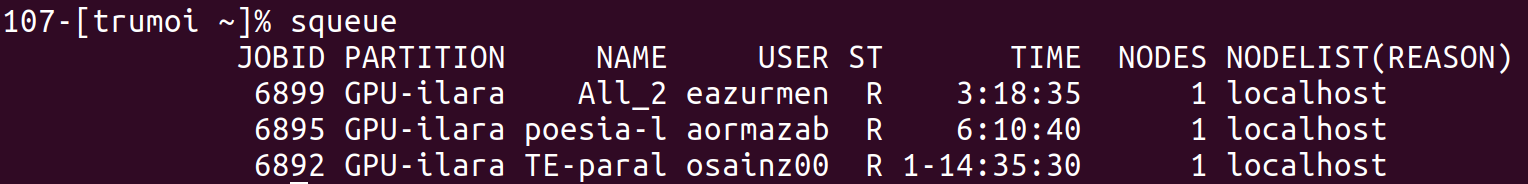

    The columns of that appear on this table mean the following:
    * JOBID:
    * PARTITION: Queue preference
    * NAME: Name of the process
    * USER: User that sent the process
    * ST: Status of the process: R = Running, P = Pending, CG = "something failed with the queue"
    * TIME: Time that the process has been running.
    * NODES: Number of nodes used by the process (always 1 in our servers).
    * NODELIST: Some extra info of the status of the process.

    Some useful arguments: You can change the format of the table enlarging it with `--format` and only show your processes with `--me`. For example, `squeue --format="%.18i %.9P %.30j %.8u %.8T %.10M %.9l %.6D %R" --me`


2. `sbatch` is the command used to add a process to the queue. For instance, `sbatch demo.sh`. An ID is given to each process in the queue.
3. `scancel`, followed by an ID, removes a process from the queue, regardless of its current state (pending, running...). For example, `scancel 6901`
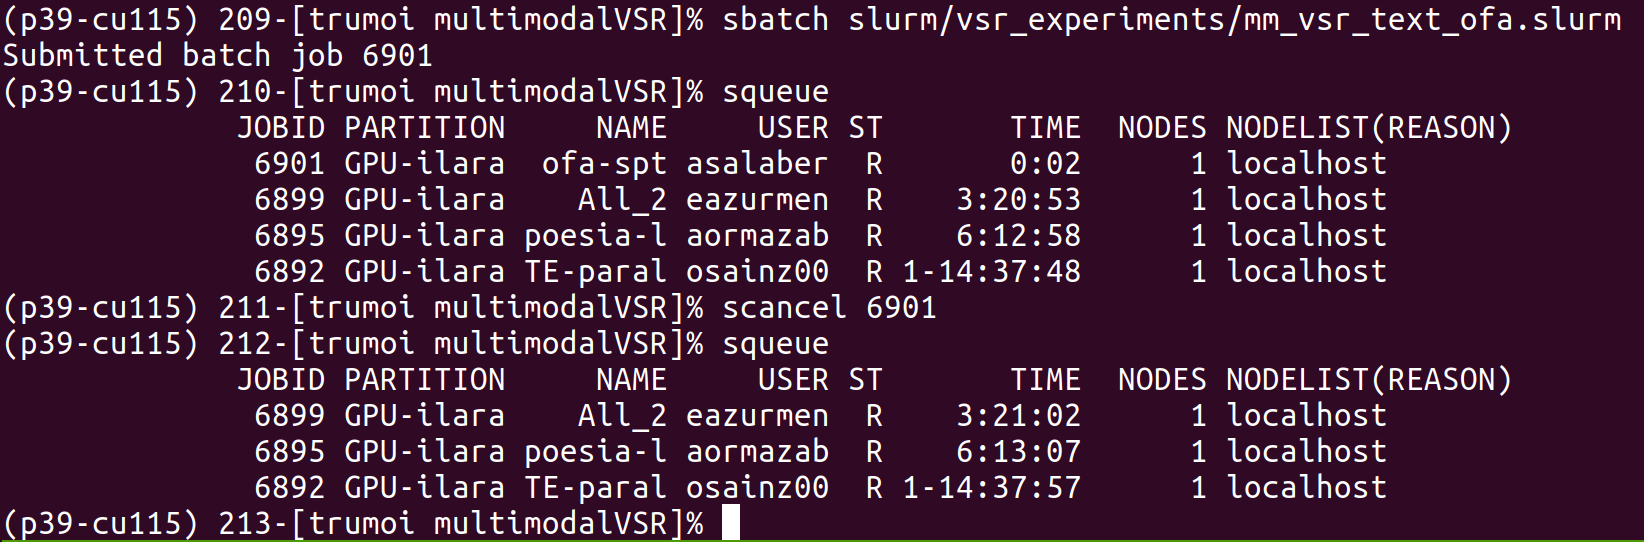



####**2. EXERCISE**
**Run a script from the downloaded repository using SLURM.**

The goal of this script is to make an inference with IXAmBERT in order to fill the gap in the following sentence: "Niri sagarrak gustatzen [MASK]!". To do so, we have prepared a script that can already be run with SLURM.

If you haven't done it in the first exercise, move into `slurm-proba` folder using `cd slurm-proba`. Then, you just need to send the process we want to SLURM using the `sbatch` command.

```
sbatch run_slurm.sh
```

For this exercise we won't look into what is inside the file. You can check with `squeue` if your process has finished (successfully or not), is running or pending with it.

**Tip:** You can use `watch squeue` to get updated information about the queue's status. `watch` runs the subsequent command every two seconds, and it comes really handy for this purpose.

Once the run finishes, an output and/or error files will be generated. In this case, the(se) file(s) can be found inside the `.slurm` folder.

```
cd .slurm             # Move to the folder
ls                    # Check the contents of the folder
more MLM_prompt.log   # Show the content of the output file
more MLM_prompt.err   # Show the content of the error file
```

Did the process fail or have we obtained good results?

### How to update your scripts

Now that we are in, let's talk about what we need tu run scripts on SLURM.

Let's say we've got a script, *demo.sh*, that we'd like to execute in one of our GPU servers. Its contents might be the following:

```
#!/bin/bash                                               # Proper header for a Bash script

# Activate the Python environment, more on that later
source /var/python3envs/transformers-4.6.0/bin/activate.csh          
export TRANSFORMERS_CACHE="/gaueko0/transformers_cache/"   # Important!! See note below

srun python test_1.py                                      # Execute our process found in 'test_1.py' 
srun python test_2.py                                      # There might be multiple processes
```

**Note:** By defining `TRANSFORMERS_CACHE` like this, we ensure that all of our models (BERTEUS, GPT,...) are stored in the same directory. Sharing this folder is beneficial for all, as you won't need to download every model each time you need it (at least if someone previously downloads it for you).

With this file, SLURM doesn't know how many GPUs, RAM memory, CPU cores... needs. That is why, after the Bash header, we have to specify our needed resources.

```
#!/bin/bash                                  # Proper header for a Bash script
#SBATCH --job-name=mintegi-demo              # Name of the process
#SBATCH --cpus-per-task=2                    # Number of CPU cores (2 is reasonable)
#SBATCH --gres=gpu:1                         # Number of GPUs (usually light processes only need 1) 
#SBATCH --mem=8G                             # RAM memory needed (8-16GB is reasonable for our servers, sometimes you'll need more)

# Activate the Python environment, more on that later
source /var/python3envs/transformers-4.6.0/bin/activate.csh
export TRANSFORMERS_CACHE="/gaueko0/transformers_cache/"

srun python test_1.py                         # Execute our process
srun python test_2.py                         # There might be multiple processes
```

This is the bare minimum that SLURM needs to handle the queue. But there are more parameters that can be defined.

For instance, once the process starts running after staying in the queue, a .out file will be generated where all of its outputs are going to be written. You can change this document's name and directory by defining: `#SBATCH --output="./mintegi.out"`. Errors are printed in another file, so you may want to define the following as well: `#SBATCH --error="./mintegi.err"`. More options are defined in this extensive page: https://slurm.schedmd.com/sbatch.html 


Once all of this is defined, we can send these processes to the queue!

####**3. EXERCISE**
**Create a Bash script that runs `training_simulation.py` with SLURM and execute it successfully.**

Once you've got a template to work with, it's easy to create one! Use your favourite text editor (we won't discriminate Emacs users), name your new file `my_first_script.sh` and use the template above with the following resources.

* 1 CPU
* 1 GPU
* 4GB of RAM

Activate the same Python environment as in the template above, we will explain how it works in the second part of this notebook.

The goal of the script is to fine-tune IXAmBERT using Masked Language Modeling. The code is very simplified, we don't recommend to use it in real sceneraios ;)

As you may notice, even if we are running our fine-tuning with a GPU, the process will take for a while. So, once you see that the process is running correctly, you can cancel it by using `scancel JOB_ID`, where `JOB_ID` is the id of your process. 

There are only 4 GPUs in this server, so the queue can get full pretty easily.

## Environment Management

We'll now jump to how to manage your own Python environments. We'll start by learning how to update environments created in Google Colab, and little by little we'll keep learning different aspects of Python environment management: load an environment in any device (local PC or servers), create an environment and install/update dependencies.  

Before starting with the actual tasks, we will go over how to create and update new Python environments in two different usecases: using Google Colab (cloud service) and using Jupyter Notebook (or anything else) in our local machines or the group's servers.

### Using Google Colab

As you connect to the Google Colab's servers, a clean Python environment will be created. It comes with basic libraries such as numpy, torch and pandas. However, you can install new dependencies or update them via bash commands (using pip). For a line to be executed with Bash instead of Python, you need to add an exclamation mark as a prefix to the command.

For example, for this notebook you will need to install the Transformers library from Huggingface. The following cell will install it for you.

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 89.4 MB/s eta 0:00:00


### Using Jupyter Notebooks in any other device

Even if Jupyter Notebooks are opened in web browsers, they are usually run locally (in our PCs) or in our own servers (both CPU or GPU servers). In both cases, we need to manage the environment we are going to use.

To do this, we've got two options:

1. Use an already created environment.
2. Create one on your own.

#### Load an environment

In order to load a Python environment, you need to know its path or directory. Luckily for us, there is an updated list of environments found in our servers that are available in our webpage: https://www.ixa.eus/gpu-zerbitzariak

Checking the page, we can decide which environment suits us best. It mostly depends on which server we are and on the dependencies we need to execute our programs.

For instance, if we need to work in *Tximista* due to the model's size, and the code requires the Transformers v4.15.0 dependency, we can opt to load the *Python3 Transformers 4.15.0* environment. This is done by executing the following command in our servers:

```
source /var/python3envs/transformers-4.15.0/bin/activate.csh
```

An easy way to read this command is to divide it in three parts. We are going to `activate` the environment located in `/var/python3envs/transformers-4.15.0` as a `source` for our needed dependencies. 

**Note:** Be careful with the `activate.csh` file. The `.csh` file extension is only used in the command line of our servers. If you try to load any environment in your local PC or in any script written in *Bash*, you should not add the file extension, that is, you should use the following command: `source /var/python3envs/transformers-4.15.0/bin/activate` 



#### Create an environment

There are some cases where these environments are not enough for what we need to do, most of the times due to missing dependencies. We could always ask our beloved technicians to add what we need, but sometimes it's just more efficient to create and manage your own environment.

For that purpose, I highly recommend to create a folder where you will store your environments. Let's say that you want to create this folder in your home directory.

```
cd ~         # Move to your home directory (it isn't mandatory, you could choose any directory)
mkdir envs   # Create a folder named envs and...
cd envs      # ...enter the folder
```

Once in the folder `envs`, we'll create an environment named `mintegi-env` with the following command.

```
python -m venv mintegi-env
```

Keep in mind that this environment will be quite basic (no Numpy, Pandas or PyTorch), so it is your responsibility to install all the dependencies you need. To do so, just load the environment and start installing dependencies with Pip.

```
source ~/envs/mintegi-env/bin/activate.csh   # Load the environment
pip install numpy pandas                     # Install numpy and pandas
```

Sometimes the code you want to use (its GitHub repository) contains a "requirements.txt". If that's the case, you should be able to install all of its dependencies by executing `pip install -r "requirements.txt"`. However, before doing that, it is important that the correct PyTorch version is installed in your environment. The following section will help you with this installation.

**Note:** It may not be the best choice to create an environment in your home directory, as environments can get quite heavy with PyTorch-like libraries (up to some GBs). Nevertheless, for this example we will use your home directory. 


### Installing PyTorch

Most of dependencies are easy to handle with `pip install ...`, but PyTorch (or Torch) is different. The installation differs with each hardware configuration, that is, different servers may need a different command to install it. Why? In order to communicate with the GPU we need to use CUDA. Although this is only used internally by PyTorch and the user usually doesn't need to code in CUDA, it is mandatory to install its correct version.

In the following link, https://pytorch.org/get-started/locally/, you can select different specifics of your hardware to help you with your installation. After selecting your PyTorch Build (stable), OS (Linux), Package (pip), Language (Python) and CUDA version (it varies depending on which GPU servers or PC you are), it will generate a command that you can execute in your terminal, installing the library successfully.

To determine which CUDA version you need, ask 2 questions to yourself.

1. Do you have a GPU?
    * If **yes**, go to question 2
    * If **not**, you don't need CUDA, select *cpu* as CUDA version
2. Which is your CUDA version?
    * Execute `nvidia-smi` in your terminal and check the CUDA version in the top right corner of the generated table. The version is defined with two numbers: "*xx.y*". In order to install it successfully, *xx* must match with your version, and your *y* should be equal to or larger than the PyTorch's version you want to install (better if it's equal).

If your CUDA is too old, you can install previous versions of CUDA with the commands found here: https://pytorch.org/get-started/previous-versions/

For example, if we are in our servers (in Mari to be more precise), we can check with `nvidia-smi` that its CUDA version is 10.1. The latest version (in Feb 2023) is only available with CUDA 11.6 or 11.7, so we need to check for the latest PyTorch version with CUDA 10.1. After checking, we can see that PyTorch v1.8.1 is the latest with CUDA 10.1, so we can install it with the following command:

```
# CUDA 10.1
pip install torch==1.8.1+cu101 torchvision==0.9.1+cu101 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
```

**Tip:** While you are checking previous versions of PyTorch, search for "cu101" with CTRL+F. Commands with this substring install PyTorch with CUDA 10.1. This can be generalized to any CUDA version.


###**4. EXERCISE**
**Let's do everything! Create and environment, install dependencies, load this Jupyter Notebook on our servers and execute an example code WITHOUT GPUs!**

Before starting, as we are going to run a Jupyter notebook in our servers and work with them in our PCs, we need to redirect ports.

Why do we need this? When we use a notebook with a web browser, the execution may not run locally. As in this case, everything is going to be computed on our servers. So, to enable communication between our laptop and server, we need to assign unique "codes" or ports to our process.

Normally port 8888 is used in the server side, but in order to avoid using the same port in multiple processes (causing errors), we are going to choose one randomly. Pick randomly a number between 9000 and 9999 (or run the following cell if you don't have any particular choice.

In [ ]:
import random

print(f"PORT: {random.randint(9000, 9999)}")

Then, you will need to connect to the servers again. Close your terminal, open a new one and type the following command with your port number.

```
ssh -L XXXX:localhost:XXXX USERNAME@kixmi.ixa.eus   # Redirects the port XXXX of the server to your PC's port XXXX
```

#### **4.1 Create an environment**

First of all, we'll create a subfolder `envs` inside our first folder `mintegi_slurm` and move to `~/mintegi_slurm/envs` in order to create a new environment. A good name should remind you the purpose of this environment, so let's call it `kixmi_mintegi`.


```
cd ~/mintegi_slurm             # Move to our main folder
mkdir envs                     # Create a folder for environments...
cd envs                        # ...and enter it

python -m venv kixmi_mintegi   # Creates a new environment in the current path
```

In order to load this environment, use the `source` command:

```
source ./kixmi_mintegi/bin/activate.csh   # Remember the file extension!
```

####**4.2 Install Dependencies**

After this, we should start installing the following dependencies with `pip`: 

* `notebook`: Also known as Jupyter notebook.
* `pandas`: Needed in order to work with dataframes.
* `torch`: Library to enable several neural-network related operations with tensors.
* `tqdm`: Enables progress bar visualizations.
* `transformers`: To do Transformer stuff.

Follow the explanations above to install them correctly. 

####**4.3 Create and run a Bash script**

Repeat what you did on Exercise 3 with the following configuration:

* 1 CPU
* 0 GPUs (we won't use them in this excercise)
* 1GB RAM

Don't forget to define your output and error filenames. Use the environment created in this exercise and, as our main process of the file, write down `srun jupyter notebook --port=XXXX`, where XXXX is the port you chose before.

Once everything is ready, run the script with `sbatch`.

If everything goes according to plan, the output file should tell us that everything the Jupyter session has been initialized successfully. It will include a link with this structure (where XXXX should be the port you have defined):

http://localhost:XXXX/?token=966749425feee7538e06cac9a6a1a97d0a3b5b88806ab3f3 `# This is an example`


Copy and paste this link into your web browser and you'll see the Jupyter session that is being executed in our servers on your web browser!

Once you are there, open this same notebook that you will find among the files downloaded from the GitHub repository: `Becoming autonomous with SLURM.ipynb`. If you followed each of these steps correctly, you will be able to execute the cells of the following section correctly. Good luck!

####**4.4 Test if everything works**

**Note:** this code also works in Google Colab, feel free to execute these cells there as well.

In [ ]:
import pandas as pd
import torch
from transformers import AutoModelForPreTraining, AutoTokenizer

This test fills the gap of a sentence in Basque. We could select any language model to do so, but we will stick to IXAmBERT for now.

In [ ]:
model_name = "ixa-ehu/ixambert-base-cased" #@param {type:"string"}
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForPreTraining.from_pretrained(model_name)

Let's define an input prompt for the language model with the [MASK] token in it. We also need to define the amount (k) of most probable words that we want to show after the language model's inference.

If you want to repeat this inference with another prompt, change it and execute all the commands below this one.

In [ ]:
prompt = "Niri sagarrak gustatzen [MASK] !" #@param {type:"string"}
k = 10 #@param {type:"integer"}

In [ ]:
# Tokenize the input sentence
inputs = tokenizer(prompt, return_tensors="pt")

# Detect which token is masked
mask_id = tokenizer("[MASK]")["input_ids"][1]
masked_index = ((inputs["input_ids"] == mask_id).nonzero(as_tuple=True)[1]).item() # [MASK] tokenaren indizea mask_id == 4 da

We'll now feed its tokenization to the language model. We are interested in the output logits of the masked token, which will be used to compute the probability of each word to appear in the masked token.

In [ ]:
outputs = model(**inputs)

We apply the softmax operation to convert logits into probabilities. We only do so for the masked token. Then, we get the top-k tokens and their respective probabilities.

In [ ]:
logits = outputs['prediction_logits']
probs = torch.nn.functional.softmax(logits, dim=-1)[0, masked_index]
top_k_weights, top_k_indices = torch.topk(probs, k, sorted=True)

We just need to show the results. We'll use pandas to visualize the results in a table.

In [ ]:
predicted_tokens = tokenizer.batch_decode([[elem] for elem in top_k_indices])
predicted_probs = [f"%{elem*100:.2f}" for elem in top_k_weights]

data = {"Predicted Tokens": predicted_tokens, "Probabilities": predicted_probs}
df = pd.DataFrame.from_dict(data)
df

,Predicted Tokens,Probabilities
0,zaizkit,%82.18
1,zaizkigu,%9.53
2,zaizkie,%1.88
3,zaizkio,%1.35
4,zitzaizkidan,%0.95
5,zait,%0.92
6,dira,%0.89
7,zaizki,%0.32
8,dizkigute,%0.16
9,zaizu,%0.14
